In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors= 'coerce')

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
for col in ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
            'Partner', 'Dependents', 'PhoneService', 'InternetService']:
    if col in data.columns:
        data[col] = data[col].replace({'No internet service': 'No', 'No phone service': 'No'})

print("\nUnique values in 'Churn' before encoding:")
print(data['Churn'].value_counts())


Unique values in 'Churn' before encoding:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [8]:
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

print("\nUnique values in 'Churn' after encoding:")
print(data['Churn'].value_counts())
print(f"Churn rate: {data['Churn'].mean():.2%}")


Unique values in 'Churn' after encoding:
Churn
0    5174
1    1869
Name: count, dtype: int64
Churn rate: 26.54%


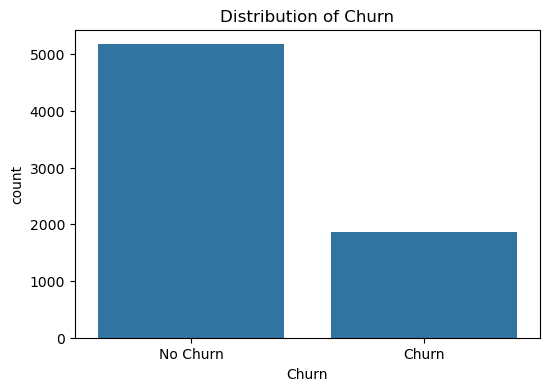

In [9]:
# Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title('Distribution of Churn')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
plt.show()

In [10]:
# Visualize numerical features vs. Churn
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('Churn') # Remove churn itself
if 'customerID' in numerical_cols: # If customerID is numeric, remove it
    numerical_cols.remove('customerID')
if 'TotalCharges' in numerical_cols: # Ensure TotalCharges is processed
    numerical_cols.remove('TotalCharges')
    numerical_cols.append('TotalCharges') # Add it back for plotting if it was removed for ID

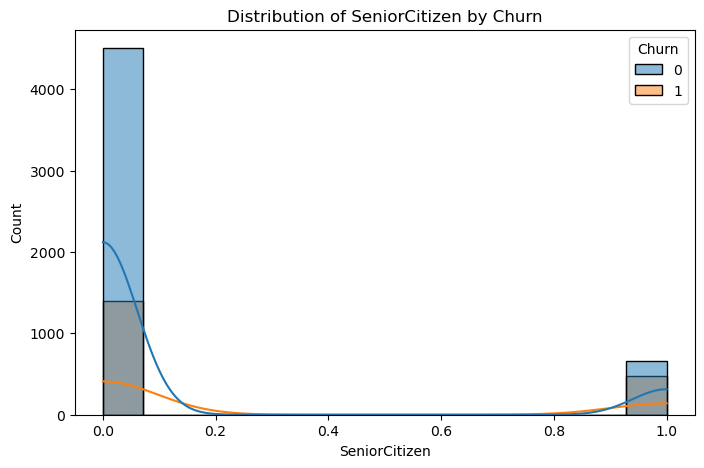

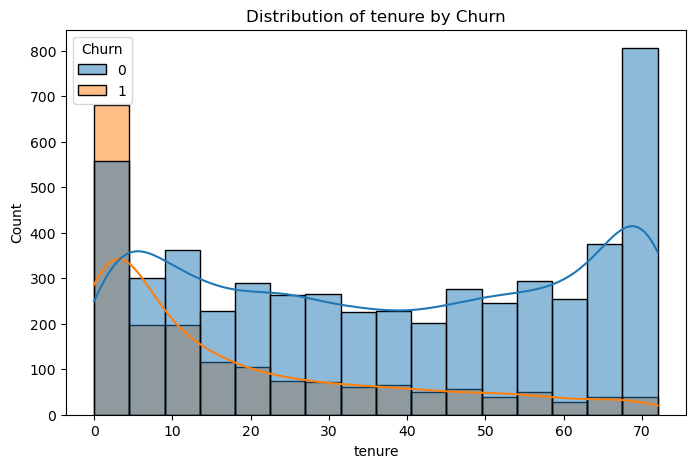

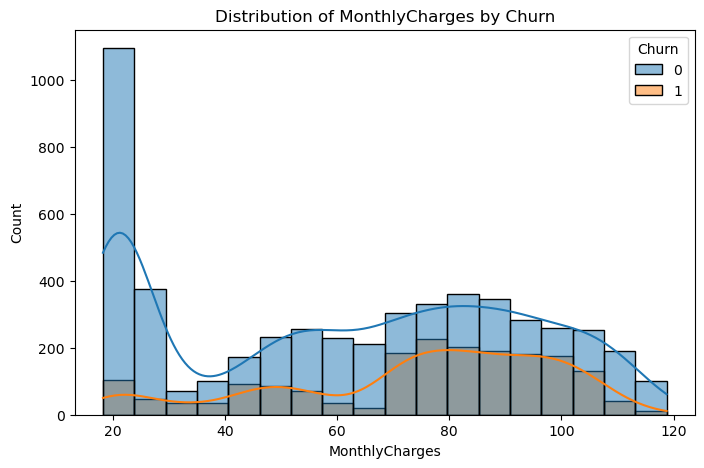

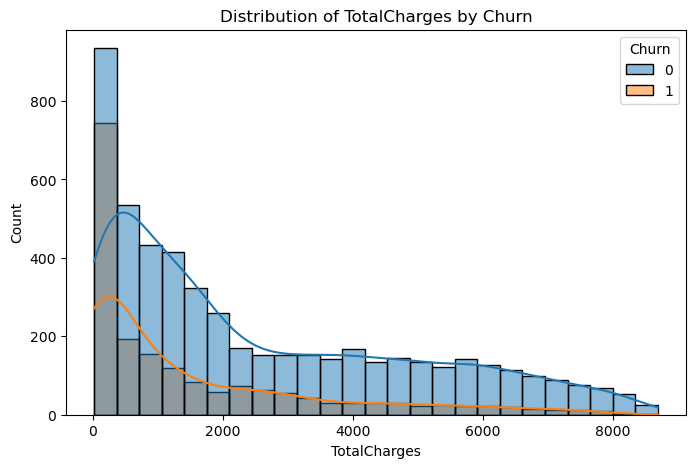

In [11]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data, x=col, hue='Churn', kde=True)
    plt.title(f'Distribution of {col} by Churn')
    plt.show()

In [12]:
# Visualize categorical features vs. Churn
categorical_cols = data.select_dtypes(include='object').columns.tolist()
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID') # Remove customerID for plotting


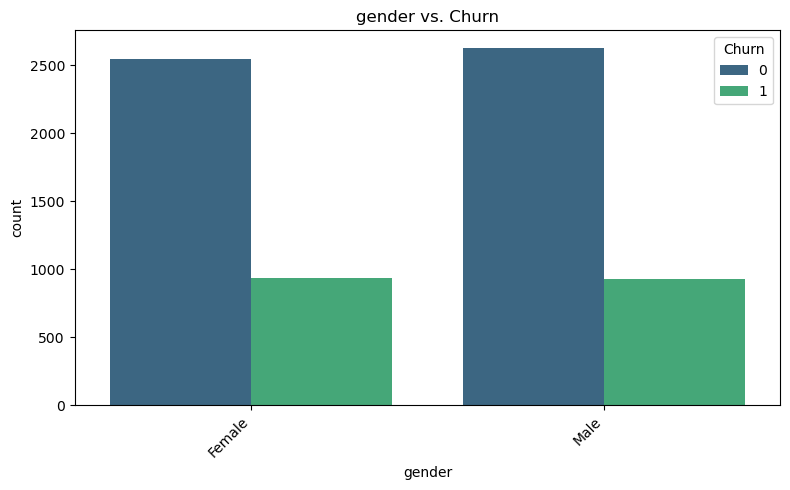

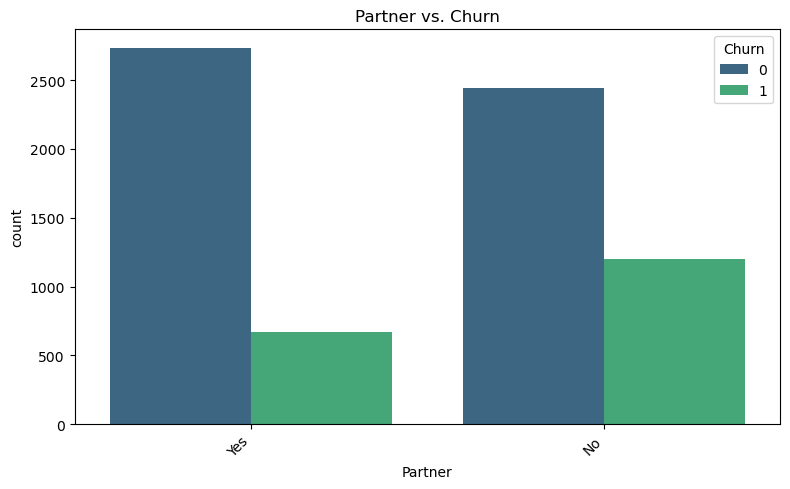

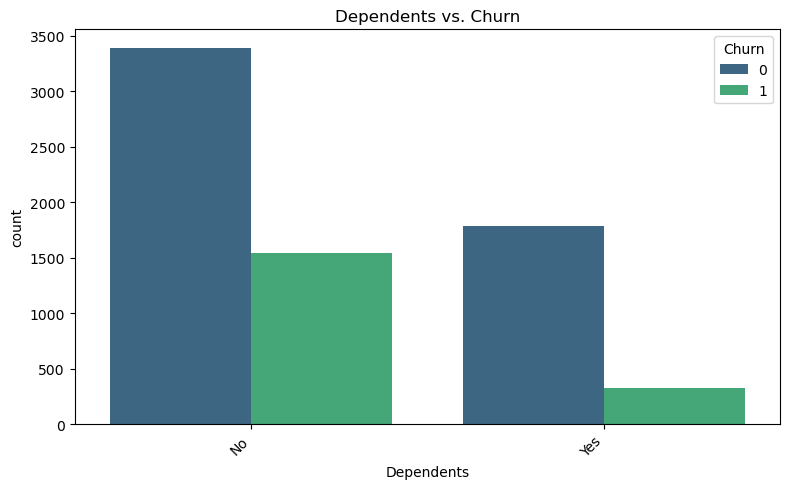

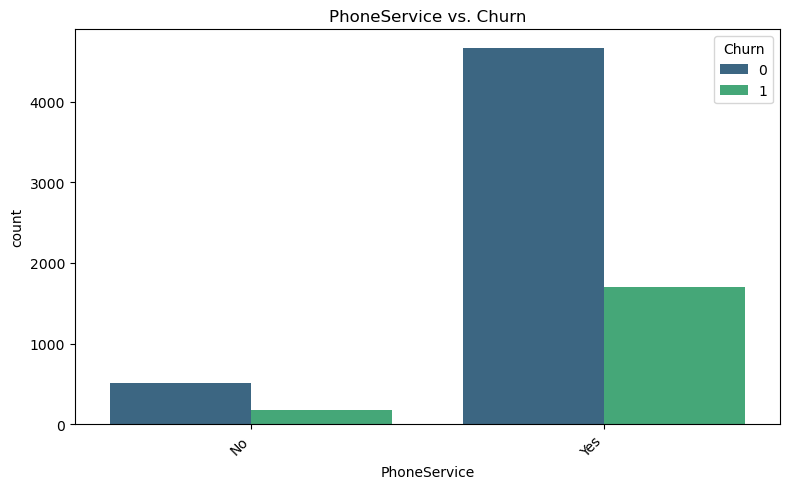

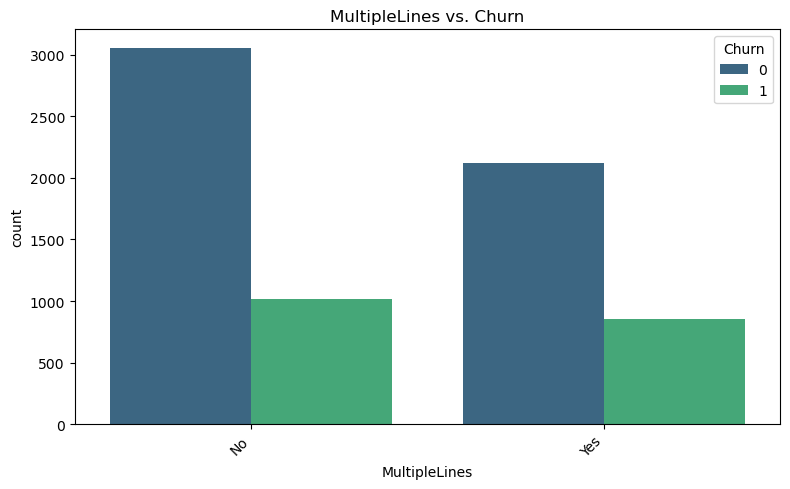

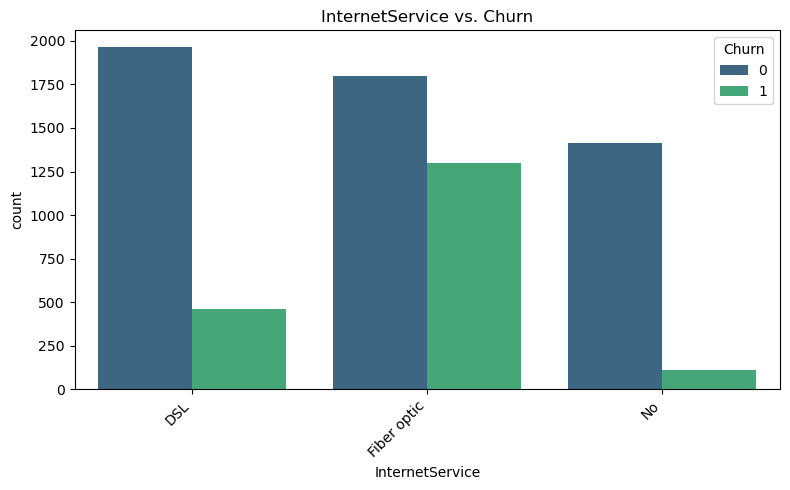

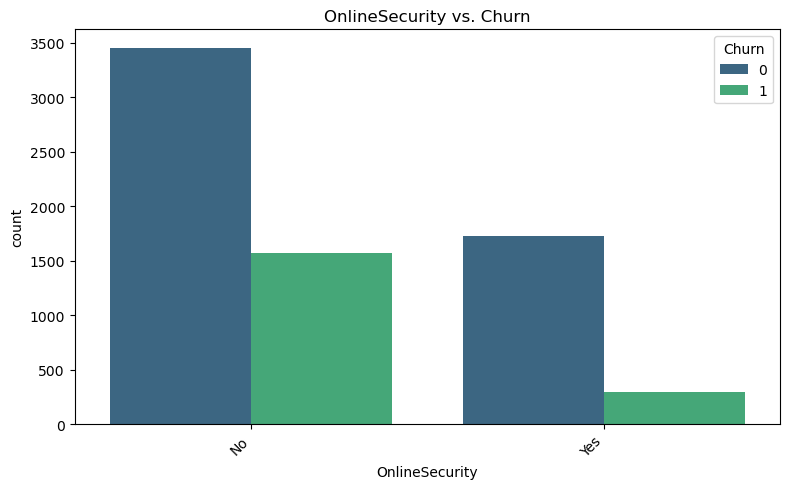

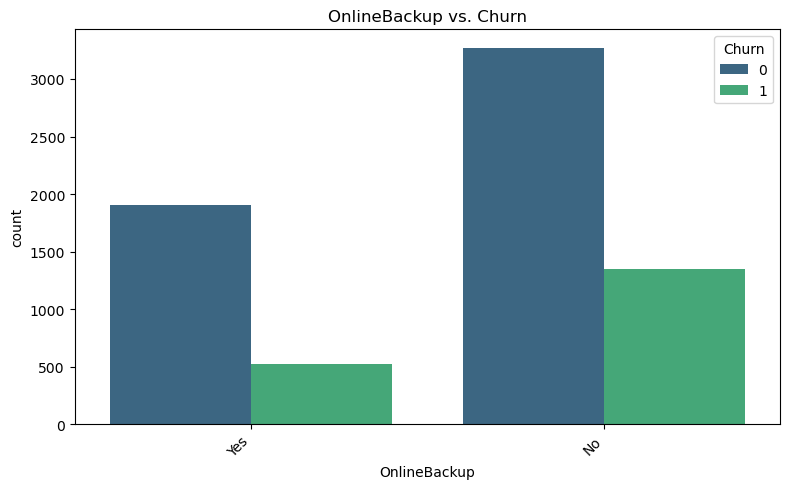

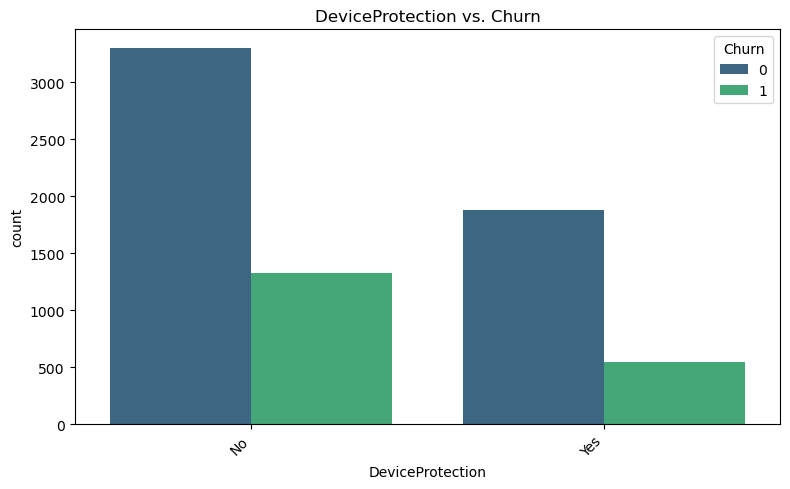

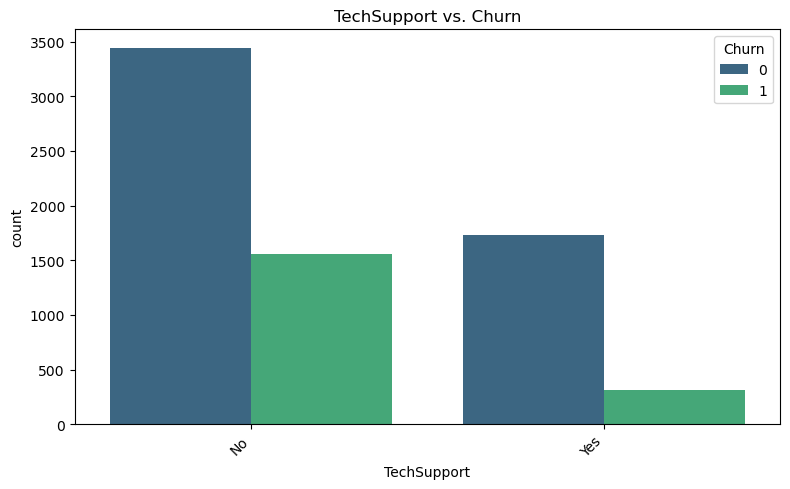

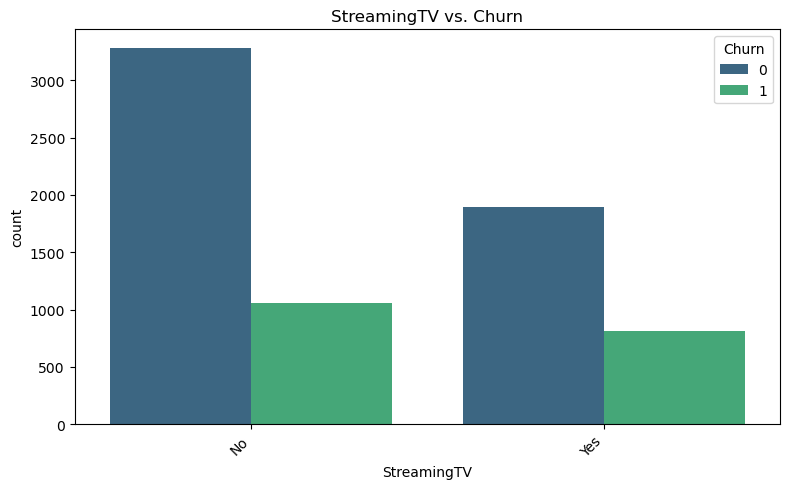

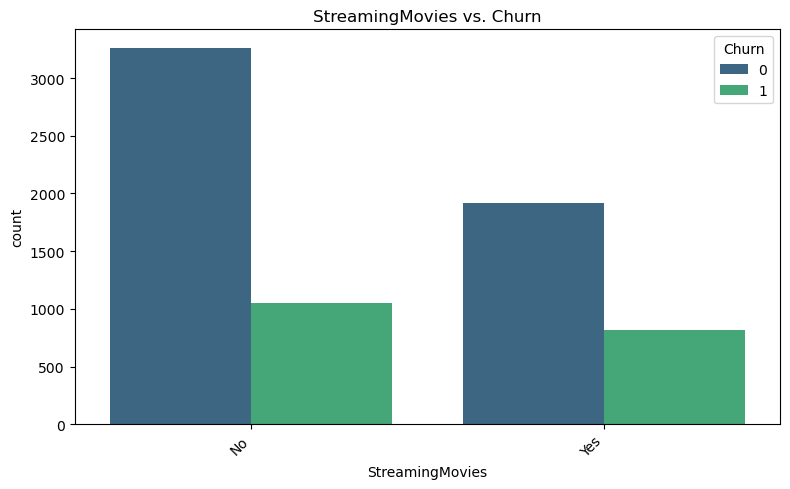

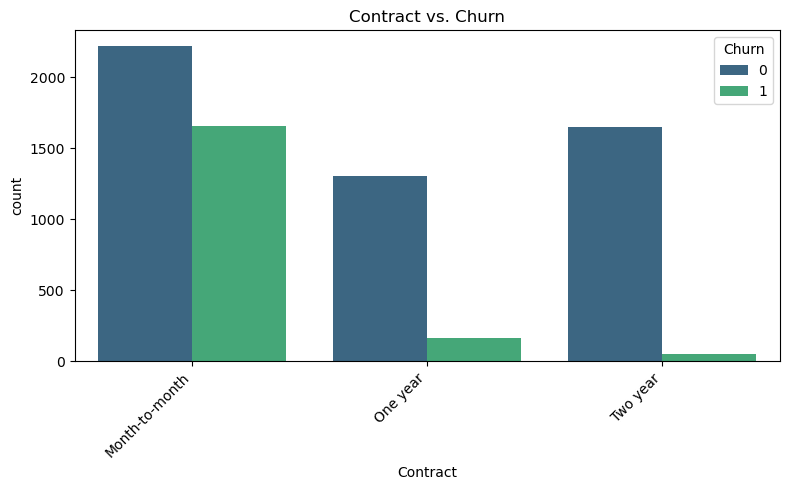

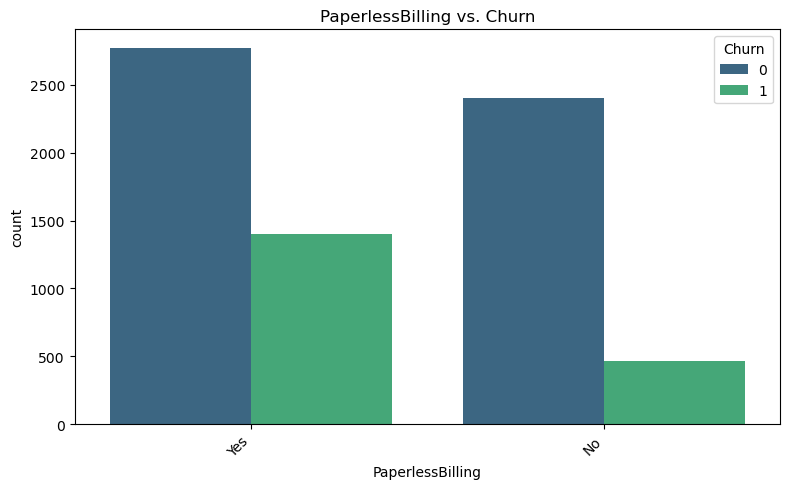

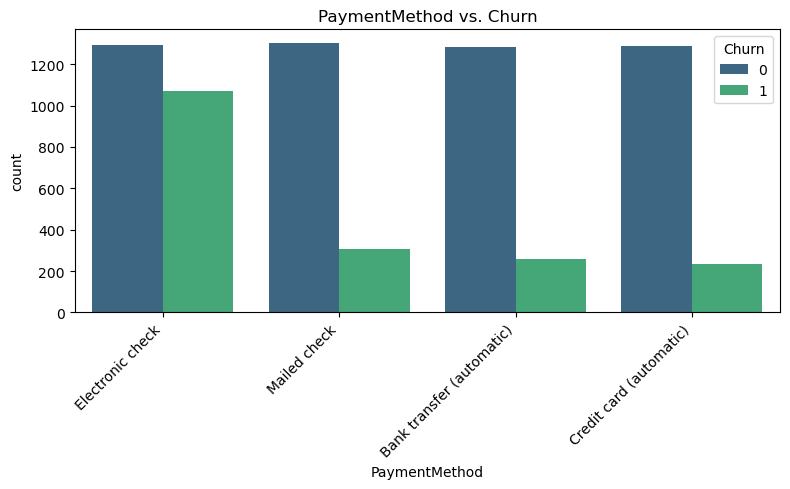

In [13]:
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=col, hue='Churn', palette='viridis')
    plt.title(f'{col} vs. Churn')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


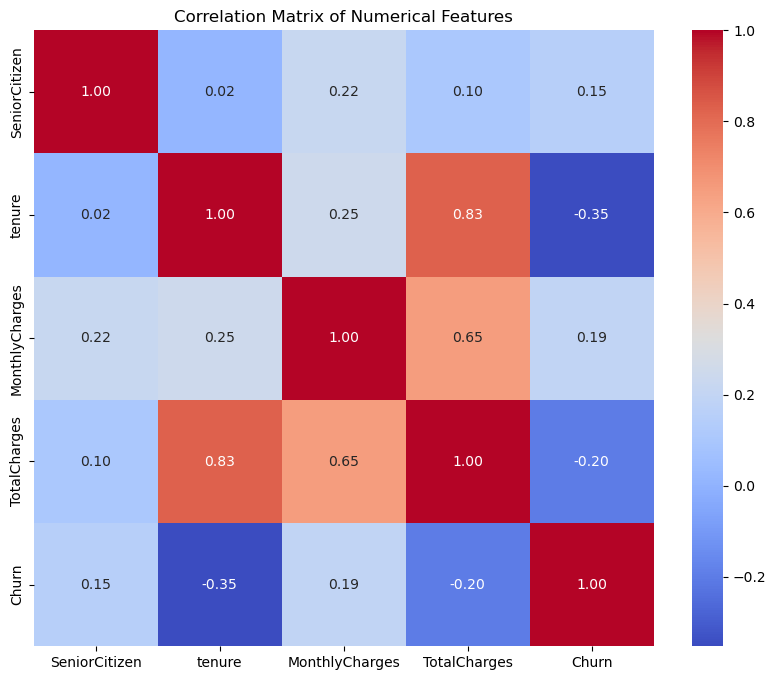

In [14]:
# Correlation Matrix for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_cols + ['Churn']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Data Preprocessing Pipeline

In [15]:
X = data.drop(['customerID', 'Churn'], axis=1) # Drop customerID as it's just an identifier
y = data['Churn']

In [16]:
# Identify numerical and categorical features for separate processing
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include='object').columns

In [17]:
numerical_features

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [18]:
categorical_features

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [19]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Impute missing numerical values with mean
    ('scaler', StandardScaler())                # Scale numerical features
])

In [20]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Impute missing categorical with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode categorical features
])

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

Data Splitting into training(80%) and testing (20%)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y) # stratify for class balance

In [24]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (5634, 19)
X_test shape: (1409, 19)
y_train shape: (5634,)
y_test shape: (1409,)


logistic Regression model 

In [25]:
model_lr = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(
                               random_state=42, solver='liblinear'
                           ))])

In [26]:
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
y_proba_lr = model_lr.predict_proba(X_test)[:, 1]

In [27]:
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.55      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.74      1409
weighted avg       0.80      0.80      0.80      1409




Logistic Regression Confusion Matrix:


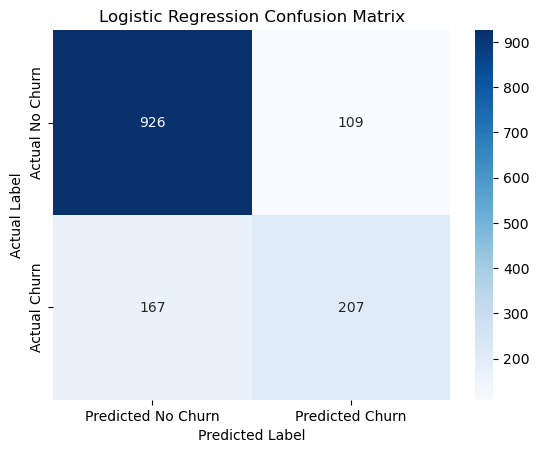

In [28]:
print("\nLogistic Regression Confusion Matrix:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [29]:
auc_lr = roc_auc_score(y_test, y_proba_lr)
print(f"Logistic Regression ROC AUC Score: {auc_lr:.4f}")

Logistic Regression ROC AUC Score: 0.8420


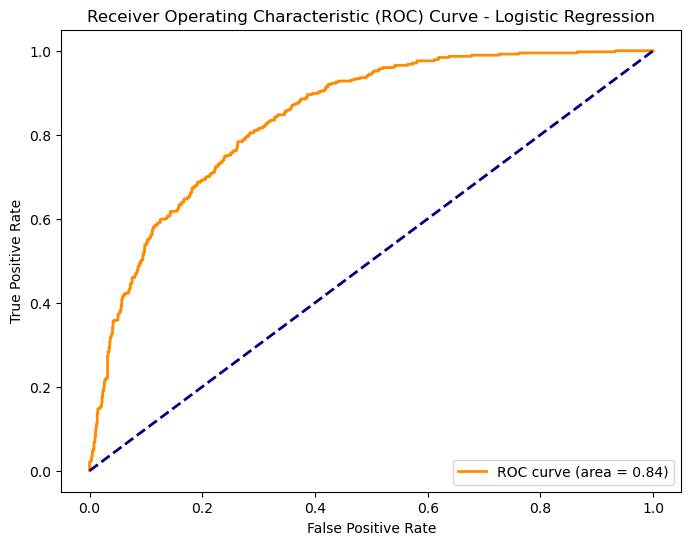

In [33]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

RandomForest Classifier model

In [34]:
model_rf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42, n_estimators=100)
                           )])

In [35]:
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
y_proba_rf = model_rf.predict_proba(X_test)[:, 1]


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1035
           1       0.60      0.48      0.53       374

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.78      0.77      1409


Random Forest Confusion Matrix:


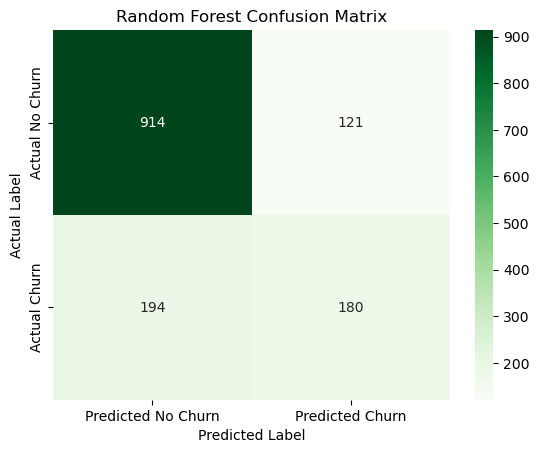

In [36]:
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nRandom Forest Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [37]:
auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"Random Forest ROC AUC Score: {auc_rf:.4f}")


Random Forest ROC AUC Score: 0.8194


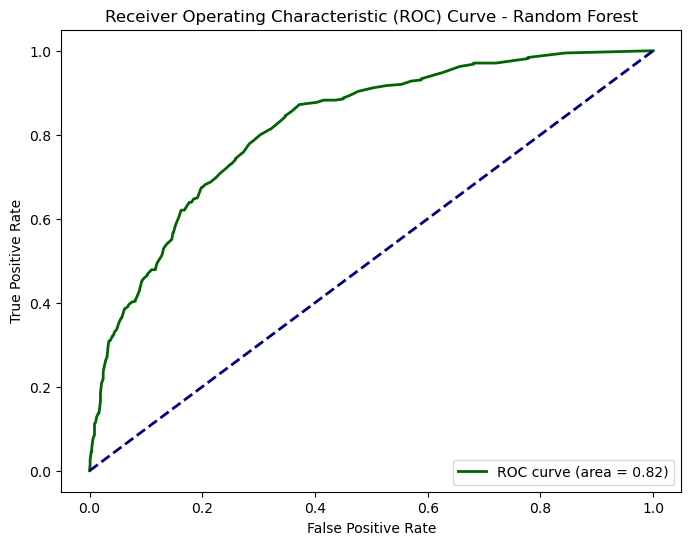

In [38]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkgreen', lw=2, label=f'ROC curve (area = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

Hyperparameter Tuning with Grid SearchCV (RandonForest)

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid_rf = {
    'classifier__n_estimators' : [100,200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2,5],
    'classifier__min_samples_split': [1,2]
}

In [43]:
print("Starting GridSearchCV for Random Forest (this may take a while)...")
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)


Starting GridSearchCV for Random Forest (this may take a while)...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/home/rehanfaraz/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/rehanfaraz/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/rehanfaraz/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/rehanfaraz/anaconda3/lib/python3.11/site-packages/sklearn/pipeline

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__max_depth': [10, 20, ...], 'classifier__min_samples_split': [1, 2], 'classifier__n_estimators': [100, 200]}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [44]:
print(f"\nBest parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best ROC AUC score on training data for Random Forest: {grid_search_rf.best_score_:.4f}")


Best parameters for Random Forest: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best ROC AUC score on training data for Random Forest: 0.8420


In [45]:
best_rf_model = grid_search_rf.best_estimator_

In [46]:
best_rf_model

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Evaluating the bst Random Forest model of the test data set

In [47]:
y_pred_best_rf = best_rf_model.predict(X_test)
y_proba_best_rf = best_rf_model.predict_proba(X_test)[:, 1]

In [48]:
print("\nBest Random Forest Classification Report (after tuning):")
print(classification_report(y_test, y_pred_best_rf))


Best Random Forest Classification Report (after tuning):
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.64      0.52      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409




Best Random Forest Confusion Matrix (after tuning):


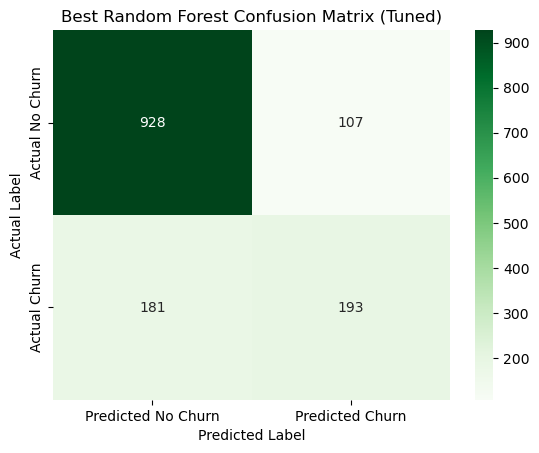

In [49]:
print("\nBest Random Forest Confusion Matrix (after tuning):")
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Best Random Forest Confusion Matrix (Tuned)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [50]:
auc_best_rf = roc_auc_score(y_test, y_proba_best_rf)
print(f"Best Random Forest ROC AUC Score (after tuning): {auc_best_rf:.4f}")

Best Random Forest ROC AUC Score (after tuning): 0.8408


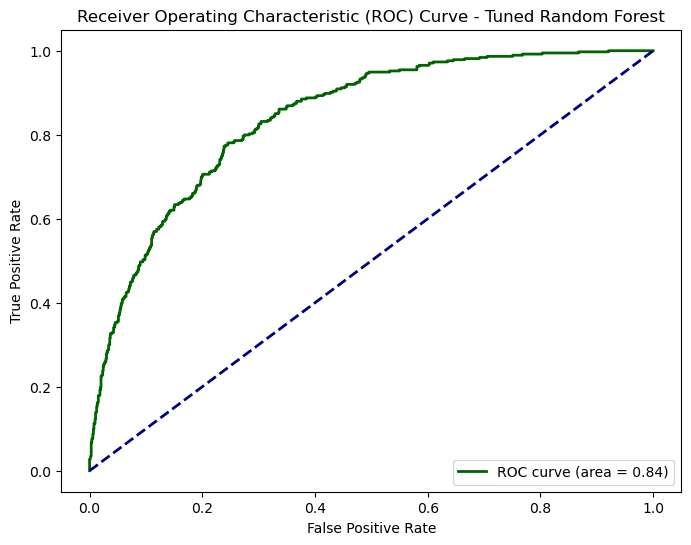

In [52]:
fpr_best_rf, tpr_best_rf, _ = roc_curve(y_test, y_proba_best_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_best_rf, tpr_best_rf, color='darkgreen', lw=2, label=f'ROC curve (area = {auc_best_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Tuned Random Forest')
plt.legend(loc="lower right")
plt.show()

In [53]:
onehot_features = best_rf_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)


In [54]:
onehot_features

array(['gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No',
       'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

In [55]:
all_transformed_features = list(numerical_features) + list(onehot_features)

In [56]:
all_transformed_features

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Female',
 'gender_Male',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'MultipleLines_No',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [57]:
feature_importances = best_rf_model.named_steps['classifier'].feature_importances_


In [58]:
feature_importances

array([0.01148624, 0.15244049, 0.10959744, 0.12782507, 0.0110846 ,
       0.01069289, 0.00959169, 0.00998063, 0.01010233, 0.00936363,
       0.00434483, 0.00454244, 0.00990215, 0.00992327, 0.01830055,
       0.05714622, 0.02773757, 0.01572432, 0.01397434, 0.01075764,
       0.01045803, 0.00802408, 0.00816288, 0.01407472, 0.01269603,
       0.00932297, 0.00958587, 0.00877926, 0.00951712, 0.11075177,
       0.01994852, 0.03849527, 0.01701722, 0.01714906, 0.00832848,
       0.00829475, 0.04722749, 0.00764811])

In [59]:
importance_df = pd.DataFrame({
    'Feature': all_transformed_features,
    'Importance': feature_importances
})

In [60]:
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [61]:
print("\nTop 10 Feature Importances:")
print(importance_df.head(10))


Top 10 Feature Importances:
                           Feature  Importance
1                           tenure    0.152440
3                     TotalCharges    0.127825
29         Contract_Month-to-month    0.110752
2                   MonthlyCharges    0.109597
15     InternetService_Fiber optic    0.057146
36  PaymentMethod_Electronic check    0.047227
31               Contract_Two year    0.038495
16              InternetService_No    0.027738
30               Contract_One year    0.019949
14             InternetService_DSL    0.018301


/tmp/ipykernel_23064/3884480089.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='magma')


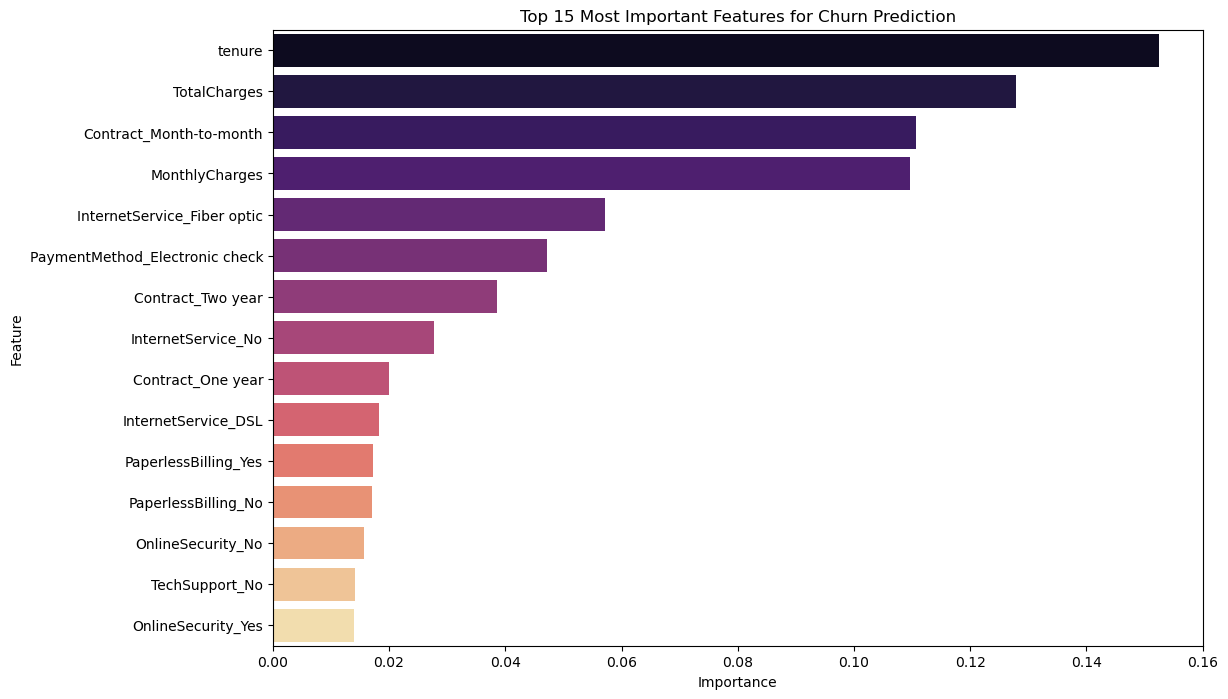

In [62]:
# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='magma')
plt.title('Top 15 Most Important Features for Churn Prediction')
plt.show()

Exploring More Advanced Models (xgboost)

In [67]:
import xgboost as xgb


In [68]:
model_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', xgb.XGBClassifier(
                                random_state=42, use_label_encoder=False, eval_metric='logloss'
                            ))])

In [69]:
print("\n--- Training XGBoost Classifier Model ---")
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
y_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]



--- Training XGBoost Classifier Model ---


/home/rehanfaraz/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [21:37:08] WARNING: /croot/xgboost-split_1749630910898/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [70]:
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))



XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1035
           1       0.59      0.52      0.55       374

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409




XGBoost Confusion Matrix:


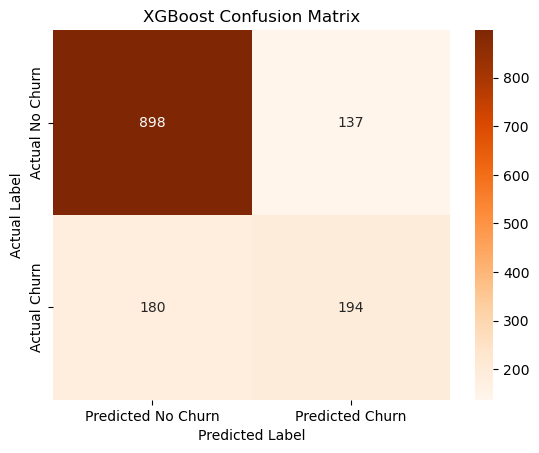

In [71]:
print("\nXGBoost Confusion Matrix:")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('XGBoost Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [72]:

auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print(f"XGBoost ROC AUC Score: {auc_xgb:.4f}")


XGBoost ROC AUC Score: 0.8188


In [73]:
# Plotting ROC Curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

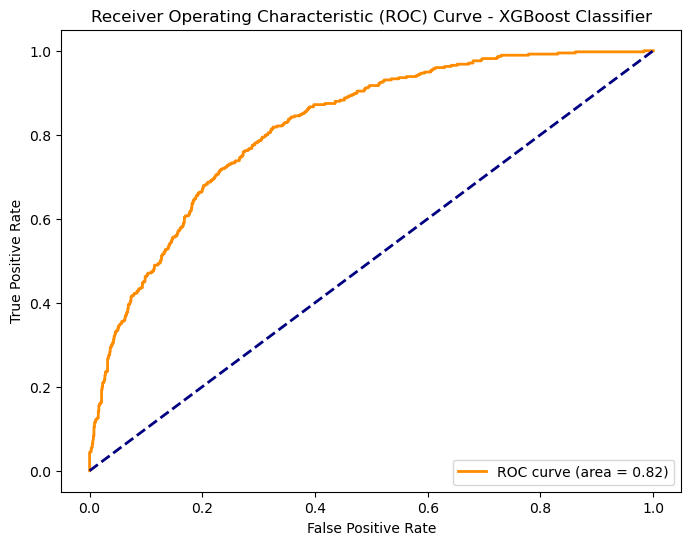

In [75]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()

In [76]:
print("\n--- 10. Conclusion and Further Steps ---")

print(f"\nSummary of Model Performance (ROC AUC Score on Test Set):")
print(f"  Logistic Regression: {auc_lr:.4f}")
print(f"  Random Forest (Untuned): {auc_rf:.4f}")
print(f"  Random Forest (Tuned): {auc_best_rf:.4f}")
print(f"  XGBoost Classifier: {auc_xgb:.4f}")


--- 10. Conclusion and Further Steps ---

Summary of Model Performance (ROC AUC Score on Test Set):
  Logistic Regression: 0.8420
  Random Forest (Untuned): 0.8194
  Random Forest (Tuned): 0.8408
  XGBoost Classifier: 0.8188
